In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
from IPython.display import clear_output

tables = {
    'orders': '/kaggle/input/test-recsys/kaggle_tab_1345/tab_1_orders.csv',
    'products': list(sorted(glob.glob('/kaggle/input/test-recsys/sbermarket_tab_2*/*'))),
    'categories': '/kaggle/input/test-recsys/kaggle_tab_1345/tab_3_categories.csv',
    'users': '/kaggle/input/test-recsys/kaggle_tab_1345/tab_4_user_profiles.csv',
    'product_properties': '/kaggle/input/test-recsys/kaggle_tab_1345/tab_5_product_properties.csv',
    'cities': '/kaggle/input/test-recsys/tab_6_city.csv',
    'sample_susmission': '/kaggle/input/test-recsys/sample_submission.csv',
}

In [3]:
products = pd.concat(list(map(lambda x: pd.read_csv(x)[['user_id', 'product_id', 'order_id']], tables['products'])))

products = products.sort_values(['user_id', 'order_id'], ascending=[True, False])
last_orders = products[['user_id', 'order_id']].groupby('user_id').head(1)

last_order_products = products.loc[products['order_id'].isin(last_orders['order_id'])].drop(columns = 'order_id').groupby('user_id')['product_id'].apply(list).reset_index()
prev_order_products = products.loc[~products['order_id'].isin(last_orders['order_id'])].drop(columns = 'order_id').groupby('user_id')['product_id'].unique().reset_index()

last_order_products['number_of_products'] = np.array(list(map(len,last_order_products.product_id.values)))
prev_order_products['number_of_products'] = np.array(list(map(len,prev_order_products.product_id.values)))

final_table = pd.merge(prev_order_products, last_order_products, how='inner', on='user_id')
list_of_intersection = [len(list(set(a) & set(b))) for a, b in zip(list(final_table['product_id_x']), list(final_table['product_id_y']))]
final_table['percent'] = np.array(list_of_intersection)/final_table['number_of_products_x'].to_numpy()*100

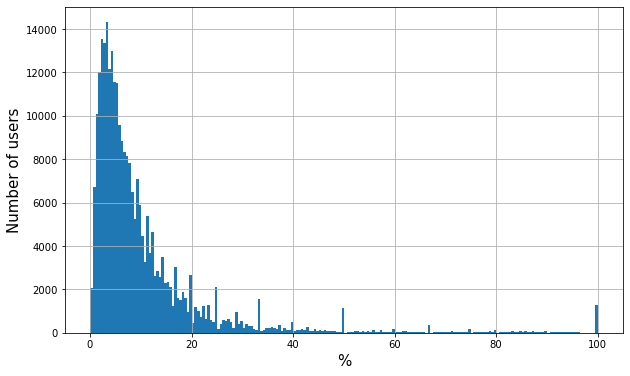

In [4]:
plt.figure(figsize=(10,6))
plt.hist(final_table[final_table['percent'] != 0]['percent'].sort_values().to_numpy(), bins=200)
plt.xlabel('%', fontsize=15)
plt.ylabel('Number of users', fontsize=15)
plt.grid()
clear_output()